In [16]:
import numpy as np

# Parameters
T = 10          # Time horizon
M = 5           # Max number of calls in the system
lambda1 = 0.5   # Arrival rate of type 1 customers
lambda2 = 0.3   # Arrival rate of type 2 customers
mu1 = 1         # Service rate of rep 1
mu2 = 2         # Service rate of rep 2
dt = 0.1        # Time step for the dynamic programming approximation

# Computation of transition costs
def expected_cost(q1, q2, assign_to_rep1, customer_type):
    if customer_type == 0:
        if assign_to_rep1:
            return (q1 + 1) / mu1 + q2 / mu2  # cost if assigned to rep 1
        else:
            return q1 / mu1 + (q2 + 1) / mu2  # cost if assigned to rep 2
    elif customer_type == 1:
        return q1 / mu1 + (q2 + 1) / mu2     # type 2 customers are assigned to rep 2

# Simulation function
def run_simulation(T, lambda1, lambda2, mu1, mu2):
    current_time = 0
    q1, q2 = 0, 0  # Initial queue lengths for Type 1 and Type 2
    history = []   # Store the simulation history
    customers_served_rep1 = 0
    customers_served_rep2_type1 = 0
    customers_served_rep2_type2 = 0

    # Generate exponential arrival times
    next_arrival1 = np.random.exponential(1 / lambda1)
    next_arrival2 = np.random.exponential(1 / lambda2)
    next_service1 = np.inf
    next_service2 = np.inf

    while current_time < T:
        # Find the next event time
        next_event_time = min(next_arrival1, next_arrival2, next_service1, next_service2)
        current_time = next_event_time

        # Handle Type 1 customer arrival
        if current_time >= next_arrival1 and q1 + q2 < M:
            print(f"Type 1 customer arrived at {current_time:.2f}")
            q1 += 1
            if q1 == 1:  # If Rep 1 was idle, schedule service
                next_service1 = current_time + np.random.exponential(1 / mu1)
            next_arrival1 += np.random.exponential(1 / lambda1)

        # Handle Type 2 customer arrival
        if current_time >= next_arrival2 and q1 + q2 < M:
            print(f"Type 2 customer arrived at {current_time:.2f}")
            q2 += 1
            if q2 == 1:  # If Rep 2 was idle, schedule service
                next_service2 = current_time + np.random.exponential(1 / mu2)
            next_arrival2 += np.random.exponential(1 / lambda2)

        # Handle service by Rep 1
        if current_time >= next_service1 and q1 > 0:
            q1 -= 1
            customers_served_rep1 += 1
            print(f"Rep 1 served a Type 1 customer at {current_time:.2f}")
            if q1 > 0:
                next_service1 = current_time + np.random.exponential(1 / mu1)
            else:
                next_service1 = np.inf

        # Handle service by Rep 2
        if current_time >= next_service2 and q2 > 0:
            q2 -= 1
            if q2 > 0:  # Serve a Type 2 customer if available
                customers_served_rep2_type2 += 1
                print(f"Rep 2 served a Type 2 customer at {current_time:.2f}")
            else:  # Otherwise serve a Type 1 customer
                customers_served_rep2_type1 += 1
                print(f"Rep 2 served a Type 1 customer at {current_time:.2f}")

            if q2 > 0:
                next_service2 = current_time + np.random.exponential(1 / mu2)
            else:
                next_service2 = np.inf

        # Record state of the system
        history.append((current_time, q1, q2))

    # Compute metrics
    avg_q1 = np.mean([state[1] for state in history])
    avg_q2 = np.mean([state[2] for state in history])
    max_q1 = max(state[1] for state in history)
    max_q2 = max(state[2] for state in history)

    return {
        "history": history,
        "avg_q1": avg_q1,
        "avg_q2": avg_q2,
        "max_q1": max_q1,
        "max_q2": max_q2,
        "customers_served_rep1": customers_served_rep1,
        "customers_served_rep2_type1": customers_served_rep2_type1,
        "customers_served_rep2_type2": customers_served_rep2_type2
    }

# Run the simulation
results = run_simulation(T, lambda1, lambda2, mu1, mu2)

# Print results
print("\nSimulation Results:")
print(f"Average Queue Length for Rep 1: {results['avg_q1']:.2f}")
print(f"Average Queue Length for Rep 2: {results['avg_q2']:.2f}")
print(f"Maximum Queue Length for Rep 1: {results['max_q1']}")
print(f"Maximum Queue Length for Rep 2: {results['max_q2']}")
print(f"Total Customers Served by Rep 1: {results['customers_served_rep1']}")
print(f"Total Type 1 Customers Served by Rep 2: {results['customers_served_rep2_type1']}")
print(f"Total Type 2 Customers Served by Rep 2: {results['customers_served_rep2_type2']}")


Type 2 customer arrived at 1.67
Rep 2 served a Type 1 customer at 2.12
Type 2 customer arrived at 3.23
Type 1 customer arrived at 3.29
Type 2 customer arrived at 3.37
Rep 2 served a Type 2 customer at 3.69
Rep 2 served a Type 1 customer at 3.77
Type 2 customer arrived at 4.31
Rep 1 served a Type 1 customer at 4.47
Rep 2 served a Type 1 customer at 4.56
Type 2 customer arrived at 5.30
Type 2 customer arrived at 5.69
Rep 2 served a Type 2 customer at 5.81
Type 2 customer arrived at 6.30
Rep 2 served a Type 2 customer at 6.30
Rep 2 served a Type 1 customer at 7.76
Type 2 customer arrived at 10.33

Simulation Results:
Average Queue Length for Rep 1: 0.29
Average Queue Length for Rep 2: 0.94
Maximum Queue Length for Rep 1: 1
Maximum Queue Length for Rep 2: 2
Total Customers Served by Rep 1: 1
Total Type 1 Customers Served by Rep 2: 4
Total Type 2 Customers Served by Rep 2: 3


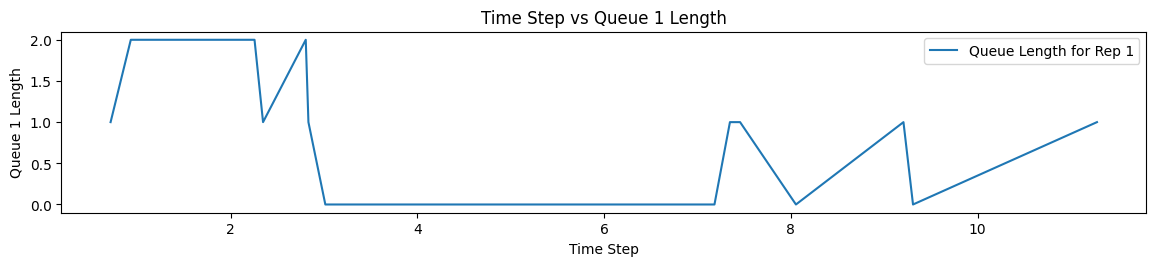

In [6]:
import matplotlib.pyplot as plt

# Extract data for plotting
times = [h[0] for h in results["history"]]
q1_lengths = [h[1] for h in results["history"]]
q2_lengths = [h[2] for h in results["history"]]
waiting_costs = [(q1 / mu1 + q2 / mu2) for q1, q2 in zip(q1_lengths, q2_lengths)]

# Plot Queue Lengths for Rep 1 and Rep 2 over time
plt.figure(figsize=(14, 8))

# Plot Time Step vs Queue 1 Length
plt.subplot(3, 1, 1)
plt.plot(times, q1_lengths, label="Queue Length for Rep 1")
plt.xlabel("Time Step")
plt.ylabel("Queue 1 Length")
plt.title("Time Step vs Queue 1 Length")
plt.legend()


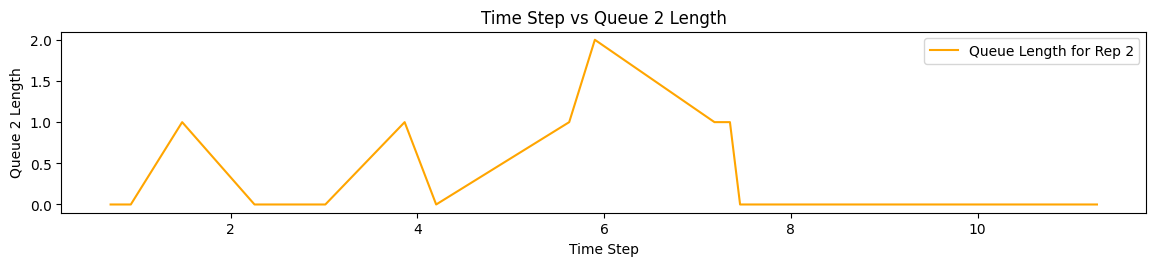

In [7]:
plt.figure(figsize=(14, 8))
# Plot Time Step vs Queue 2 Length
plt.subplot(3, 1, 2)
plt.plot(times, q2_lengths, label="Queue Length for Rep 2", color='orange')
plt.xlabel("Time Step")
plt.ylabel("Queue 2 Length")
plt.title("Time Step vs Queue 2 Length")
plt.legend()

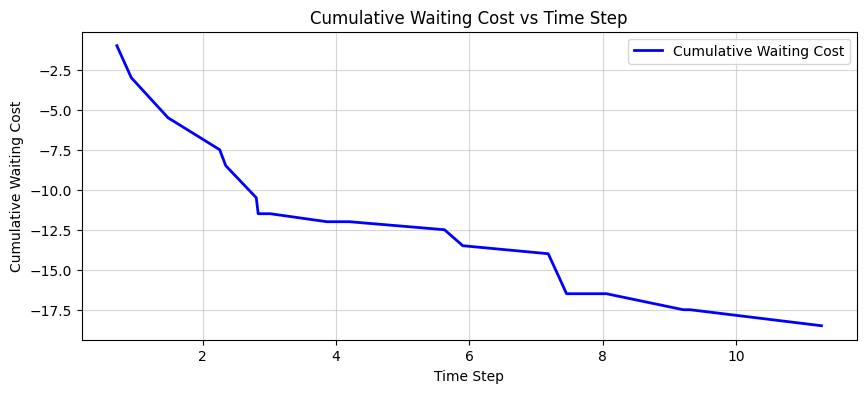

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def plot_inverted_cumulative_waiting_cost(history):
    # Extract data for plotting
    times = [h[0] for h in history]
    q1_lengths = [h[1] for h in history]
    q2_lengths = [h[2] for h in history]
    
    # Calculate waiting cost for each time step and compute cumulative sum
    waiting_costs = [(q1 / mu1 + q2 / mu2) for q1, q2 in zip(q1_lengths, q2_lengths)]
    cumulative_waiting_costs = np.cumsum(waiting_costs)
    
    # Plot Time Step vs Cumulative Waiting Cost
    plt.figure(figsize=(10, 4))
    plt.plot(times, -cumulative_waiting_costs, label="Cumulative Waiting Cost", color='blue', linewidth=2)
    plt.xlabel("Time Step")
    plt.ylabel("Cumulative Waiting Cost")
    plt.title("Cumulative Waiting Cost vs Time Step")
    plt.legend()
    plt.grid(alpha=0.5)  
    
    # Display the plot
    plt.show()

# Run the plot function with the simulation history
plot_inverted_cumulative_waiting_cost(results["history"])